<a href="https://colab.research.google.com/github/LavanyaSrini/NLP/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Classification

Sacasam Dataset without LSTM

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [24]:
import json
import requests


datastore = requests.get('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json')
print(datastore.text[0:450])
sentences = []
labels = []
urls = []

for item in datastore.json():
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

tokenizer=Tokenizer(oov_token="<00v>")
tokenizer.fit_on_texts(sentences)
word_index =tokenizer.word_index
#print(word_index)
Seq=tokenizer.texts_to_sequences(sentences)
padded=pad_sequences(Seq , padding='post')
print(Seq[0])
print(padded[0])
print(padded.shape)

[
{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0},
{"article_link": "https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365", "headline": "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "is_sarcastic": 0},
[308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434]
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [25]:
training_size = round(len(sentences) * .75)
print(training_size)
print(len(sentences))

20032
26709


In [26]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [27]:
tokenizer = Tokenizer(10000,oov_token='oov_tok')
tokenizer.fit_on_texts(training_sentences)

In [28]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen= 100, padding='post', truncating='post')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen= 100, padding='post', truncating='post')

In [29]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, embedding_dim, input_length=100),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                38424     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 198,449
Trainable params: 198,449
Non-trainable params: 0
_________________________________________________________________


In [30]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
# Training the model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
626/626 - 2s - loss: 0.4546 - accuracy: 0.7679 - val_loss: 0.3319 - val_accuracy: 0.8561
Epoch 2/30
626/626 - 2s - loss: 0.2214 - accuracy: 0.9118 - val_loss: 0.3209 - val_accuracy: 0.8627
Epoch 3/30
626/626 - 2s - loss: 0.1291 - accuracy: 0.9548 - val_loss: 0.3561 - val_accuracy: 0.8622
Epoch 4/30
626/626 - 2s - loss: 0.0710 - accuracy: 0.9796 - val_loss: 0.4116 - val_accuracy: 0.8588
Epoch 5/30
626/626 - 2s - loss: 0.0334 - accuracy: 0.9915 - val_loss: 0.4736 - val_accuracy: 0.8553
Epoch 6/30
626/626 - 2s - loss: 0.0156 - accuracy: 0.9974 - val_loss: 0.5439 - val_accuracy: 0.8523
Epoch 7/30
626/626 - 2s - loss: 0.0073 - accuracy: 0.9990 - val_loss: 0.6056 - val_accuracy: 0.8504
Epoch 8/30
626/626 - 2s - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.6541 - val_accuracy: 0.8486
Epoch 9/30
626/626 - 2s - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.7079 - val_accuracy: 0.8484
Epoch 10/30
626/626 - 2s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.7405 - val_accuracy: 0.8499

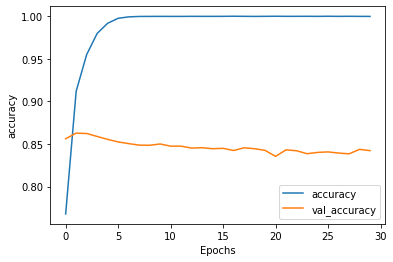

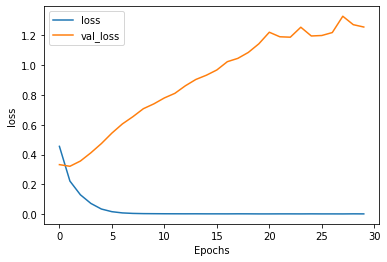

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")


With Bidirectional LSTM

In [32]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, embedding_dim, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [33]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
# Training the model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
626/626 - 30s - loss: 0.4217 - accuracy: 0.7915 - val_loss: 0.3283 - val_accuracy: 0.8570
Epoch 2/30
626/626 - 29s - loss: 0.2246 - accuracy: 0.9078 - val_loss: 0.3428 - val_accuracy: 0.8582
Epoch 3/30
626/626 - 30s - loss: 0.1492 - accuracy: 0.9442 - val_loss: 0.3810 - val_accuracy: 0.8526
Epoch 4/30
626/626 - 30s - loss: 0.0942 - accuracy: 0.9669 - val_loss: 0.4609 - val_accuracy: 0.8471
Epoch 5/30
626/626 - 30s - loss: 0.0596 - accuracy: 0.9804 - val_loss: 0.5525 - val_accuracy: 0.8402
Epoch 6/30
626/626 - 30s - loss: 0.0386 - accuracy: 0.9880 - val_loss: 0.6269 - val_accuracy: 0.8415
Epoch 7/30
626/626 - 30s - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.7993 - val_accuracy: 0.8357
Epoch 8/30
626/626 - 29s - loss: 0.0180 - accuracy: 0.9947 - val_loss: 0.8891 - val_accuracy: 0.8383
Epoch 9/30
626/626 - 30s - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.9085 - val_accuracy: 0.8380
Epoch 10/30
626/626 - 30s - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.9057 - val_accura

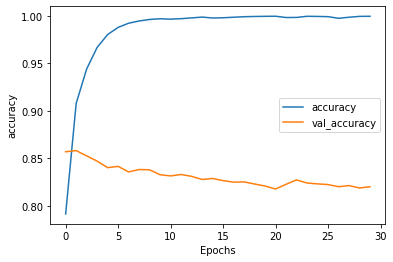

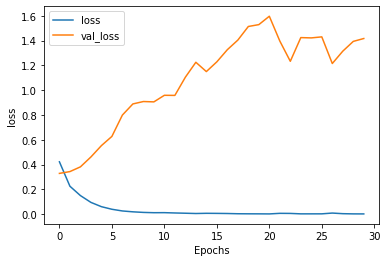

In [34]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")


In [35]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, embedding_dim, input_length=100),
    tf.keras.layers.Conv1D(128,5,activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           10368     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
_________________________________________________________________


In [36]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
# Training the model
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
626/626 - 7s - loss: 0.4415 - accuracy: 0.7785 - val_loss: 0.3652 - val_accuracy: 0.8393
Epoch 2/30
626/626 - 7s - loss: 0.2301 - accuracy: 0.9089 - val_loss: 0.3672 - val_accuracy: 0.8486
Epoch 3/30
626/626 - 7s - loss: 0.1218 - accuracy: 0.9573 - val_loss: 0.4464 - val_accuracy: 0.8384
Epoch 4/30
626/626 - 7s - loss: 0.0499 - accuracy: 0.9849 - val_loss: 0.5735 - val_accuracy: 0.8363
Epoch 5/30
626/626 - 7s - loss: 0.0187 - accuracy: 0.9951 - val_loss: 0.7243 - val_accuracy: 0.8368
Epoch 6/30
626/626 - 7s - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.8127 - val_accuracy: 0.8335
Epoch 7/30
626/626 - 7s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.9021 - val_accuracy: 0.8336
Epoch 8/30
626/626 - 7s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.9897 - val_accuracy: 0.8351
Epoch 9/30
626/626 - 7s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.0402 - val_accuracy: 0.8323
Epoch 10/30
626/626 - 7s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.0978 - val_accuracy: 0.8306

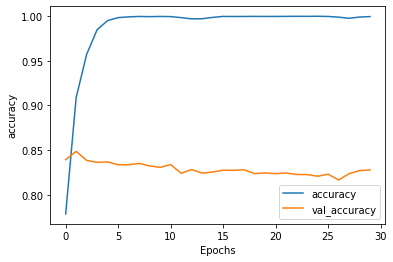

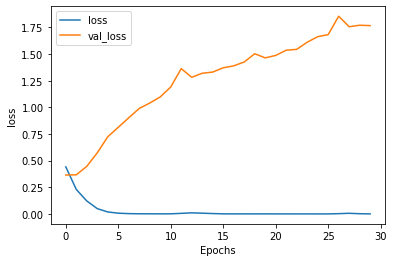

In [37]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")